In [ ]:
## 제4장. 데이터 전처리
## 제1절. 데이터 전처리의 의미
# 데이터 클리닝 : 결측치 처리, 이상치 확인 및 정제 등
# 데이터 통합 : 다양한 데이터 파일의 결합 등
# 데이터 변환 : 스케일링, 요약 등
# 데이터 축소 : 변수 축소, 라벨링 등
# 불균현 데이터 처리 : 언더 샘플링, 오버 샘플링 등
# 데이터 분할 : train, test, 데이터 분할 등

In [1]:
## 제2절 이상치 확인 및 정제
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

wine_load = load_wine()
wine = pd.DataFrame(wine_load.data, columns=wine_load.feature_names)
wine['Class'] = wine_load.target
wine['Class'] = wine['Class'].map({0:'class_0', 1:'class_1', 2:'class_2'})

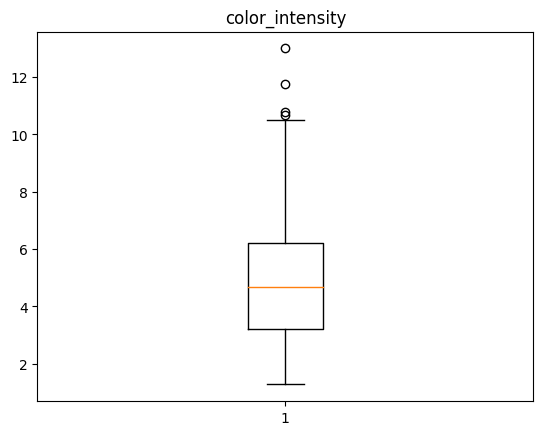

In [3]:
import matplotlib.pyplot as plt

plt.boxplot(wine['color_intensity'], whis=1.5)
plt.title('color_intensity')
plt.show()

In [4]:
import numpy as np

def outliers_iqr(dt, col):
    quartile_1, quartile_3 = np.percentile(dt[col], [25, 75])
    iqr = quartile_3 - quartile_1
    lower_whis = quartile_1 - (iqr * 1.5)
    upper_whis = quartile_3 + (iqr * 1.5)
    outliers = dt[(dt[col] > upper_whis) | (dt[col] < lower_whis)]
    return outliers[[col]]

In [5]:
outliers = outliers_iqr(wine,'color_intensity')
outliers

,color_intensity
151,10.80
158,13.00
159,11.75
166,10.68


In [6]:
# 3.이상치 정제
# 3.1 이상치 제거
drop_outliers = wine.drop(index=outliers.index)

print('Original :', wine.shape)
print('Drop outliers :', drop_outliers.shape)

Original : (178, 14)
Drop outliers : (174, 14)


In [7]:
# 3.2 이상치 대체
wine.loc[outliers.index, 'color_intensity'] = np.NaN
wine['color_intensity'] = wine['color_intensity'].fillna(wine['color_intensity'].mean())
wine.loc[outliers.index, 'color_intensity']

151    4.908678
158    4.908678
159    4.908678
166    4.908678
Name: color_intensity, dtype: float64

In [15]:
# 이상치 대체 v2
wine.loc[outliers.index, 'color_intensity'] = wine['color_intensity'].mean()
wine.loc[outliers.index, 'color_intensity']

151    4.908678
158    4.908678
159    4.908678
166    4.908678
Name: color_intensity, dtype: float64

In [16]:
# 3. 범주형 변수 처리
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['Class'] = load_iris().target
iris['Class'] = iris['Class'].map({0:'Setosa', 1:'Versicolour', 2:'Virginica'})

In [22]:
iris['Class'].value_counts()

Setosa         50
Versicolour    50
Virginica      50
Name: Class, dtype: int64

In [17]:
iris_dummy = pd.get_dummies(iris, columns = ['Class'])
iris_dummy

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class_Setosa,Class_Versicolour,Class_Virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [4]:
## 4. 데이터 분할
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['Class'] = load_iris().target
iris['Class'] = iris['Class'].map({0:'Setosa', 1:'Versicolour', 2:'Virginica'})

In [28]:
## train_test_split
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(arrays, test_size = None,
#                                                     train_size = None, rendom_state = None, shuffle = True,
#                                                     stratify = None
#                                                     )

# X : 독립변수 테이블
# Y : 종속변수 테이블
# test_size : 테스트 사이즈 비율
# random_state : 임의의 번호 지정, 같은 숫자를 사용하면 같은 출력이 나옴
# shuffle : True이면 추출전에 데이터를 섞음. False이면 섞지 않음
# stratify : None이 아닌 경우 데이터는 지정한 변수를 기준으로 계층화되어 해당 변수의 비율을 유지하도록 추출

ModuleNotFoundError: No module named 'sklearn.model'

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.drop(columns='Class'), iris['Class'], test_size = 0.2, random_state = 2021)
print('X_train :', X_train.shape, '\tX_test :', X_test.shape)
print('y_train :', y_train.shape, '\ty_test :', y_test.shape)

X_train : (120, 4) 	X_test : (30, 4)
y_train : (120,) 	y_test : (30,)


In [48]:
X_train.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
81,5.5,2.4,3.7,1.0
97,6.2,2.9,4.3,1.3
34,4.9,3.1,1.5,0.2


In [49]:
y_train.head(3)

81    Versicolour
97    Versicolour
34         Setosa
Name: Class, dtype: object

In [50]:
iris['Class'].value_counts()

Setosa         50
Versicolour    50
Virginica      50
Name: Class, dtype: int64

In [51]:
y_train.value_counts()

Virginica      44
Versicolour    40
Setosa         36
Name: Class, dtype: int64

In [52]:
X_train, X_test, y_train, y_test = train_test_split(iris.drop(columns='Class'), iris['Class'], test_size = 0.2, stratify =iris['Class']) # stratify 층화추출
print('X_train :', X_train.shape, '\tX_test :', X_test.shape)
print('y_train :', y_train.shape, '\ty_test :', y_test.shape)

X_train : (120, 4) 	X_test : (30, 4)
y_train : (120,) 	y_test : (30,)


In [53]:
y_train.value_counts()

Setosa         40
Virginica      40
Versicolour    40
Name: Class, dtype: int64

In [ ]:
## 5. 데이터 스케일링
# 5.1 데이터 스케일링 방법
# a) Scaler 선택 및 import
# b) Scaler 객체 생성
# c) train 데이터의 분포 저장
# d) train 데이터 스케일링
# e) test 데이터 스케일링
# f) 원래 스케일로 변환

In [6]:
# 5.2 Standard Scaling
# 회귀보다는 분류분석에서 유용하다.
from sklearn.preprocessing import StandardScaler

StdScaler = StandardScaler()

# Train 데이터의 fitting과 스케일링
StdScaler.fit(X_train)
X_train_sc = StdScaler.transform(X_train)

# Test 데이터의 스케일링
X_test_sc = StdScaler.transform(X_test)

print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_train_sc.min(), X_train_sc.max(),  X_train_sc.mean(),  X_train_sc.std()))
print("Test_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_test_sc.min(), X_test_sc.max(),  X_test_sc.mean(),  X_test_sc.std()))

		(min, max) (mean, std)
Train_scaled (-2.32, 2.93) (0.00, 1.00)
Test_scaled (-2.00, 1.56) (-0.35, 0.93)


### Min-Max Scaler

In [7]:
# 분류보다는 회귀분석에서 유용하다.
from sklearn.preprocessing import MinMaxScaler

MmScaler = MinMaxScaler()

# Train 데이터의 fitting과 스케일링
MmScaler.fit(X_train)
X_train_sc = MmScaler.transform(X_train)

# Test 데이터의 스케일링
X_test_sc = MmScaler.transform(X_test)


print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_train_sc.min(), X_train_sc.max(),  X_train_sc.mean(),  X_train_sc.std()))
print("Test_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_test_sc.min(), X_test_sc.max(),  X_test_sc.mean(),  X_test_sc.std()))

		(min, max) (mean, std)
Train_scaled (0.00, 1.00) (0.46, 0.27)
Test_scaled (-0.04, 0.92) (0.36, 0.25)


### Max Abs Scaler

In [8]:
# 분류보다는 회귀분석에서 유용하다.
from sklearn.preprocessing import MaxAbsScaler

MaScaler = MaxAbsScaler()

# Train 데이터의 fitting과 스케일링
MaScaler.fit(X_train)
X_train_sc = MaScaler.transform(X_train)

# Test 데이터의 스케일링
X_test_sc = MaScaler.transform(X_test)


print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_train_sc.min(), X_train_sc.max(),  X_train_sc.mean(),  X_train_sc.std()))
print("Test_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_test_sc.min(), X_test_sc.max(),  X_test_sc.mean(),  X_test_sc.std()))

		(min, max) (mean, std)
Train_scaled (0.04, 1.00) (0.63, 0.23)
Test_scaled (0.04, 0.92) (0.56, 0.24)


### Robust Scaler

In [9]:
from sklearn.preprocessing import RobustScaler

RuScaler = RobustScaler()

# Train 데이터의 fitting과 스케일링
RuScaler.fit(X_train)
X_train_sc = RuScaler.transform(X_train)

# Test 데이터의 스케일링
X_test_sc = RuScaler.transform(X_test)

print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_train_sc.min(), X_train_sc.max(),  X_train_sc.mean(),  X_train_sc.std()))
print("Test_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_test_sc.min(), X_test_sc.max(),  X_test_sc.mean(),  X_test_sc.std()))

		(min, max) (mean, std)
Train_scaled (-1.67, 2.33) (-0.01, 0.62)
Test_scaled (-1.15, 1.08) (-0.21, 0.56)


### 원본 스케일로 변경

In [10]:
pd.DataFrame(X_train_sc).head(3)

,0,1,2,3
0,-0.230769,-1.000000,-0.212766,-0.266667
1,0.307692,-0.166667,-0.042553,-0.066667
2,-0.692308,0.166667,-0.836879,-0.800000


In [11]:
# scaler.inverse_transform()
X_Original = RuScaler.inverse_transform(X_train_sc)
pd.DataFrame(X_Original).head(3)

,0,1,2,3
0,5.5,2.4,3.7,1.0
1,6.2,2.9,4.3,1.3
2,4.9,3.1,1.5,0.2


## 6.주성분 분석 (차원 축소)

In [12]:
# 6.1 설명변수 선택
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['Class'] = load_iris().target
iris['Class'] = iris['Class'].map({0:'Setosa', 1:'Versicolour', 2:'Virginica'})

In [13]:
# 수치형 데이터만 추출
features = ['수치형변수1', '수치형변수2']
x = iris.drop(columns = 'Class')

# 수치형 변수 정규화
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

pd.DataFrame(x).head()

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [14]:
# 주성분 추출
from sklearn.decomposition import PCA
pca = PCA( n_components = 4) 
pca_fit = pca.fit(x)

print("고유 값 : ", pca.singular_values_)
print("분산 설명력: ", pca.explained_variance_ratio_)

고유 값 :  [20.92306556 11.7091661   4.69185798  1.76273239]
분산 설명력:  [0.72962445 0.22850762 0.03668922 0.00517871]


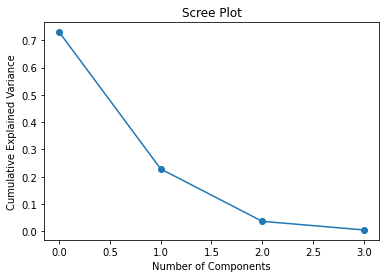

In [26]:
import matplotlib.pyplot as plt

plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.plot(pca.explained_variance_ratio_ , 'o-')
plt.show()

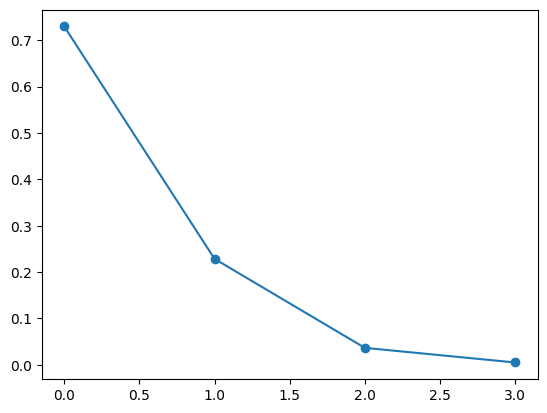

In [15]:
plt.plot(pca.explained_variance_ratio_ , 'o-')

In [16]:
pca = PCA(n_components = 2)                        # PCA 객체 생성 (주성분 갯수 2개 생성)
principalComponents = pca.fit_transform(x)     # 2개의 주성분을 가진 데이터로 변환
principal_iris = pd.DataFrame(data = principalComponents, columns =['pc1', 'pc2']) 
principal_iris.head()

,pc1,pc2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


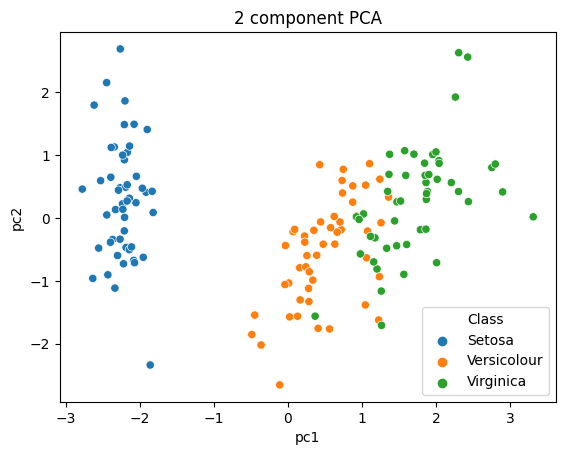

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.title('2 component PCA' )
sns.scatterplot(x = 'pc1', y = 'pc2', hue = iris.Class,  data = principal_iris)
plt.show()

In [24]:
# SVM분류
from sklearn.svm import SVR 
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

iris01 = pd.concat([iris, principal_iris], axis = 1)

from sklearn.model_selection import train_test_split
X = principal_iris
y = iris['Class']

# train, test를 7:3 비율로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=2023)



In [30]:
# SVM  최적 모델 찾기
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# 테스트하고자 하는 파라미터 값들을 사전타입으로 정의

parameters = {'gamma':[0.1, 1, 10] ,'C': [0.01, 0.1 ,0.5, 1, 10,20,30]}

grid_svm = GridSearchCV(SVC(), param_grid = parameters, cv = 5)
grid_svm.fit(X_train, y_train)

result = pd.DataFrame(grid_svm.cv_results_['params'])
result['mean_test_score'] = grid_svm.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)


,C,gamma,mean_test_score
10,1.00,1.0,0.914286
7,0.50,1.0,0.914286
18,30.00,0.1,0.904762
15,20.00,0.1,0.904762
12,10.00,0.1,0.904762
13,10.00,1.0,0.904762
6,0.50,0.1,0.895238
4,0.10,1.0,0.885714
19,30.00,1.0,0.885714
16,20.00,1.0,0.885714


## 7.불균형 처리

In [34]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_classification
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

x, y = make_classification(n_samples=2000, n_features=6, weights=[0.95], flip_y=0)
print(Counter(y))

Counter({0: 1900, 1: 100})


### 7.1 언더 샘플링

In [35]:
undersample = RandomUnderSampler(sampling_strategy='majority') # majority : 다수 레이블의 데이터를 샘플링하여 소수 레이블의 데이터수와 동일하게 축소
x_under, y_under = undersample.fit_resample(x, y)
print(Counter(y_under))

Counter({0: 100, 1: 100})


In [36]:
undersample = RandomUnderSampler(sampling_strategy=0.5) 
x_under2, y_under2 = undersample.fit_resample(x, y)
print(Counter(y_under2))

Counter({0: 200, 1: 100})


In [37]:
undersample = RandomUnderSampler(sampling_strategy=1) 
x_under3, y_under3 = undersample.fit_resample(x, y)
print(Counter(y_under3))

Counter({0: 100, 1: 100})


### 7.2 오버 샘플링
RandomOverSampler

In [38]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy=0.5) 
x_over, y_over = oversample.fit_resample(x, y)
print(Counter(y_over))

Counter({0: 1900, 1: 950})


In [39]:
oversample = RandomOverSampler(sampling_strategy='minority')
x_over, y_over = oversample.fit_resample(x, y)
print(Counter(y_over))

Counter({0: 1900, 1: 1900})


SMOTE

In [40]:
from imblearn.over_sampling import SMOTE
smote_sample = SMOTE(sampling_strategy='minority') 
x_sm, y_sm = smote_sample.fit_resample(x, y)
print(Counter(y_sm))

Counter({0: 1900, 1: 1900})


TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 2 keyword-only arguments) were given

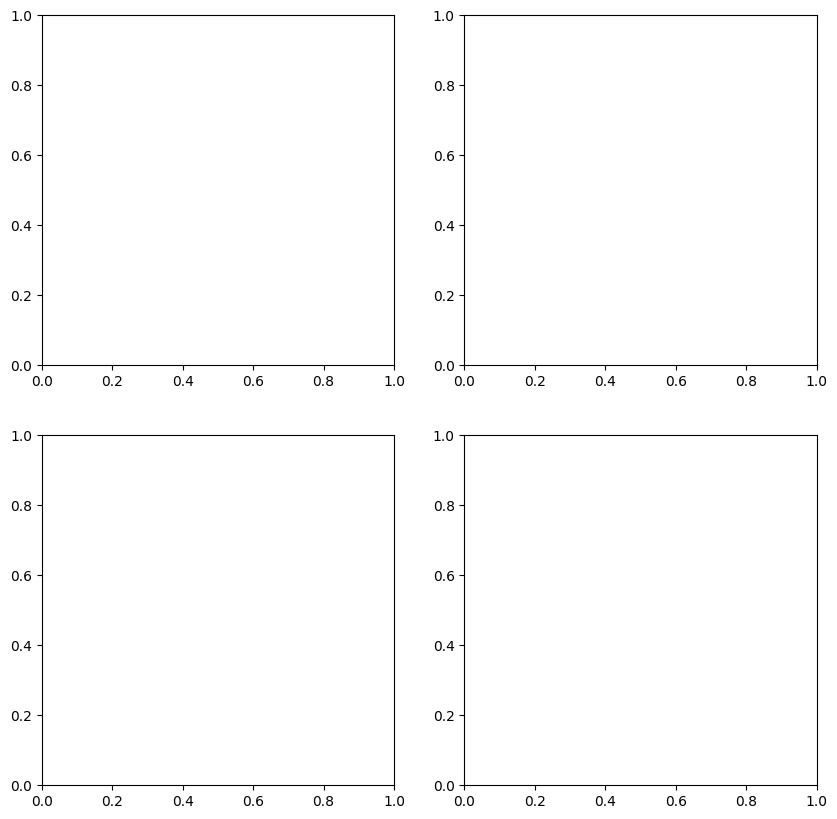

In [45]:
from matplotlib import pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

sns.scatterplot(x[:, 1], x[:, 2], hue=y, ax=axes[0][0], alpha=0.5)
sns.scatterplot(x_under[:, 1], x_under[:,2], hue=y_under, ax=axes[0][1], alpha=0.5)
sns.scatterplot(x_over[:, 1], x_over[:, 2], hue=y_over, ax=axes[1][0], alpha=0.5)
sns.scatterplot(x_sm[:, 1], x_sm[:, 2], hue=y_sm, ax=axes[1][1], alpha=0.5)

axes[0][0].set_title('Original Data')
axes[0][1].set_title('Random Under Sampling')
axes[1][0].set_title('Random Over Sampling')
axes[1][1].set_title('SMOTE')

plt.show()